In [1]:
%%capture
%pip install nbformat
%run utils.ipynb

2025-07-18 20:29:56.045060: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-18 20:29:56.045098: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-18 20:29:56.046333: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-18 20:29:56.054674: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-18 20:29:56.853057: W tensorflow/compiler/tf2

In [2]:
# Autoencoder
autoencoder = models.Model(encoder.input, decoder(encoder(encoder.input)))
# autoencoder.summary(show_trainable=True)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train, x_train, epochs=5, batch_size=128, validation_data=(x_test, x_test))

Epoch 1/5
469/469 [==============================] - 51s 107ms/step - loss: 0.0353 - val_loss: 0.0189
Epoch 2/5
469/469 [==============================] - 49s 106ms/step - loss: 0.0159 - val_loss: 0.0145
Epoch 3/5
469/469 [==============================] - 50s 106ms/step - loss: 0.0132 - val_loss: 0.0123
Epoch 4/5
469/469 [==============================] - 48s 103ms/step - loss: 0.0118 - val_loss: 0.0112
Epoch 5/5
469/469 [==============================] - 56s 119ms/step - loss: 0.0108 - val_loss: 0.0106


1/1 [==============================] - 0s 268ms/step


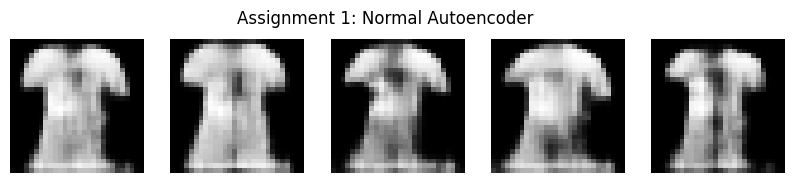

In [3]:
# Generate images from noise
noise = sample_noise((5, latent_dim))
generated = decoder.predict(noise)
show_images(generated, "Assignment 1: Normal Autoencoder")